# Display postprocessed images detected disks

In [1]:
import sys
sys.path.append('..')

In [2]:
import os  
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
from segmentation_models.backbones import get_preprocessing

from classes.image_utils import ImageUtils
from classes.model_utils import ModelUtils
from classes.process_results import ProcessResults
from classes.visualize import VisualizeUtils

Using TensorFlow backend.
/home/andrea/env/diplomka3/lib/python3.6/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


## Initialize

In [3]:
val_frame_path = '/home/andrea/learning/vessel_segmentation/disk/val_imgs/val'
val_mask_path = '/home/andrea/learning/vessel_segmentation/disk/val_masks/val'

img_height = 768
img_width = 768

backbone = 'resnet18'

preprocess_input = get_preprocessing(backbone)
image_ut = ImageUtils(val_frame_path, val_mask_path, img_height, img_width, architecture='unet')
process_results = ProcessResults()

## Load model

In [4]:
model_RESNET18_150 = ModelUtils.load_model('/home/andrea/learning/vessel_segmentation/result_code/UNET/models/model_unet_disk_pretrainedRESNET18_6')

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


## Filtering and tresholding predicted images

In [5]:
process_results.predict_images_from_dir(backbone='resnet18',
                                        val_frame_path=val_frame_path,
                                        val_mask_path=val_mask_path,
                                        model=model_RESNET18_150,
                                        img_height=img_height,
                                        img_width=img_width)

In [6]:
filtered_images = []

for im in process_results._predicted_imgs:
    filt_img = process_results.med_ext_med_filter(im)
    filtered_images.append(process_results.tresholding(filt_img))

## Plot predicted masks

/home/andrea/env/diplomka3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

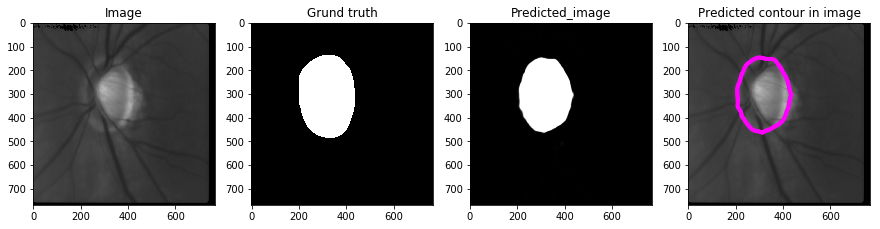

<Figure size 432x288 with 0 Axes>

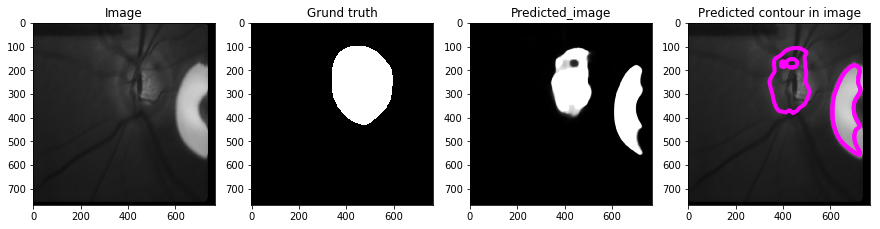

<Figure size 432x288 with 0 Axes>

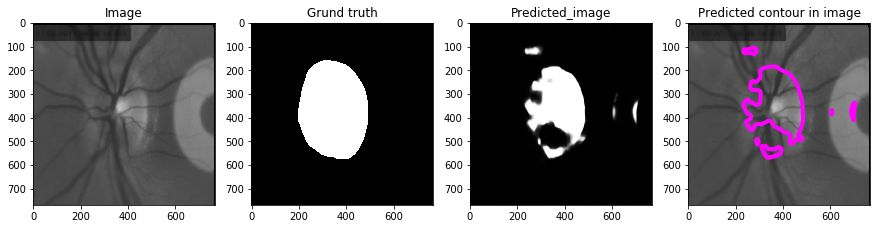

<Figure size 432x288 with 0 Axes>

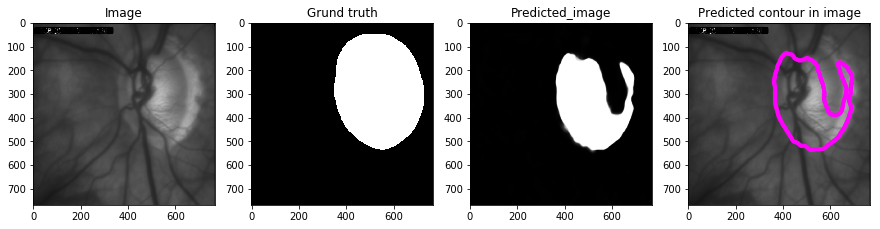

<Figure size 432x288 with 0 Axes>

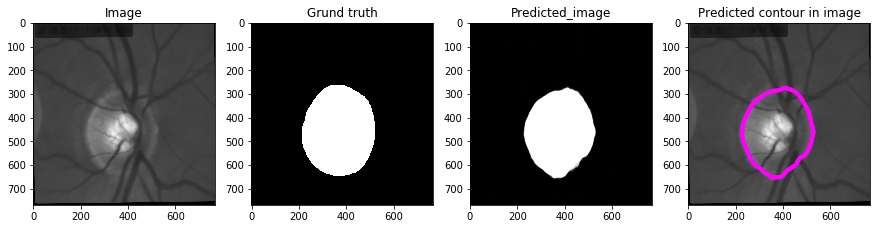

<Figure size 432x288 with 0 Axes>

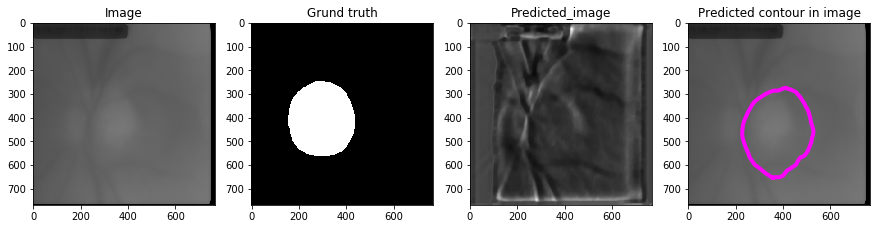

<Figure size 432x288 with 0 Axes>

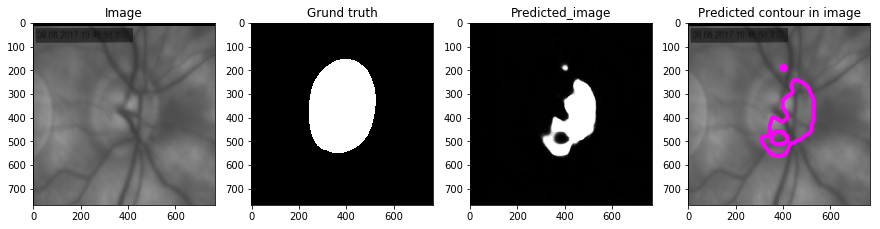

<Figure size 432x288 with 0 Axes>

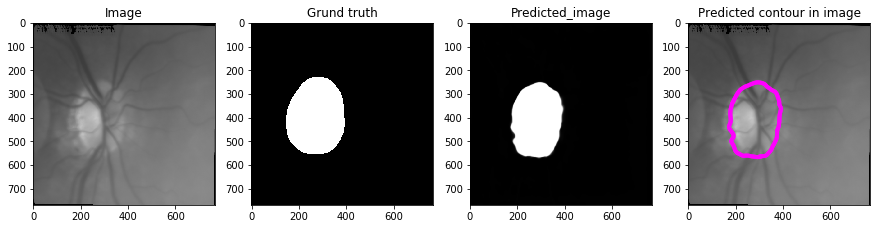

<Figure size 432x288 with 0 Axes>

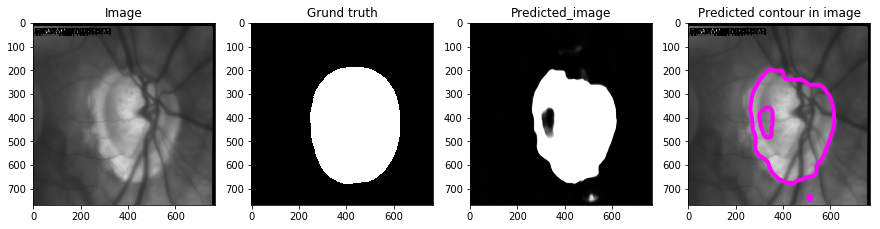

<Figure size 432x288 with 0 Axes>

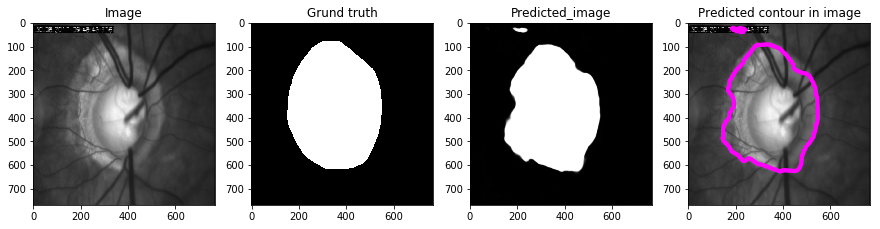

<Figure size 432x288 with 0 Axes>

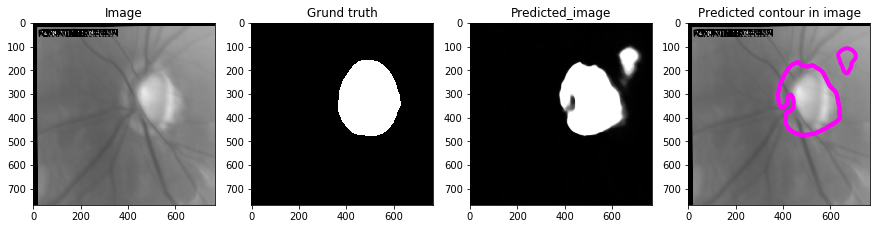

<Figure size 432x288 with 0 Axes>

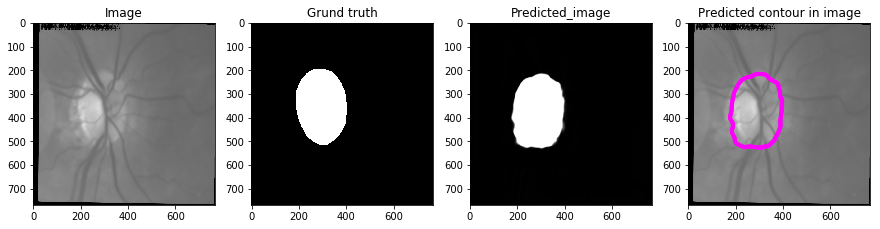

<Figure size 432x288 with 0 Axes>

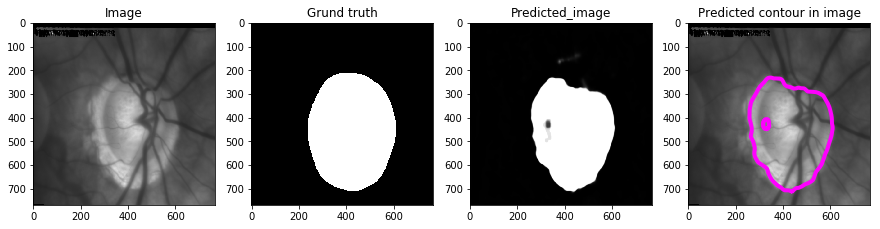

<Figure size 432x288 with 0 Axes>

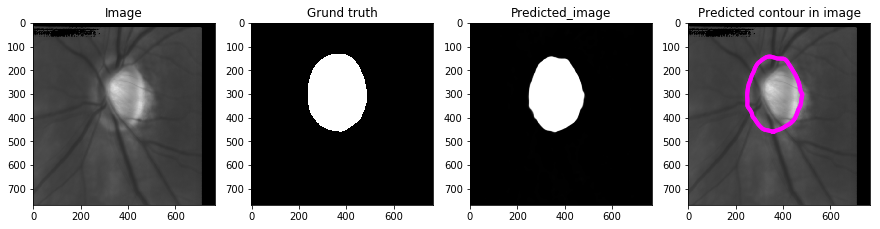

<Figure size 432x288 with 0 Axes>

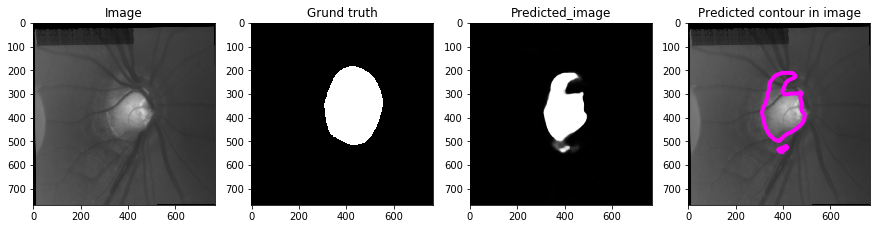

<Figure size 432x288 with 0 Axes>

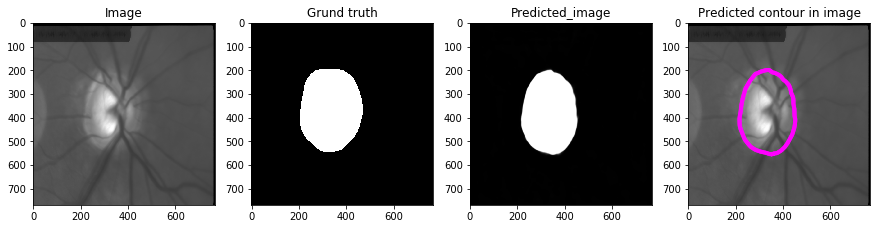

<Figure size 432x288 with 0 Axes>

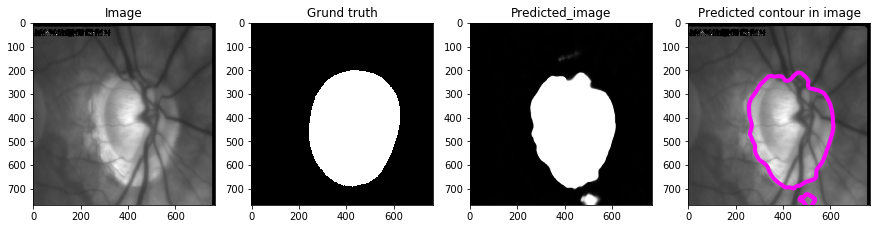

<Figure size 432x288 with 0 Axes>

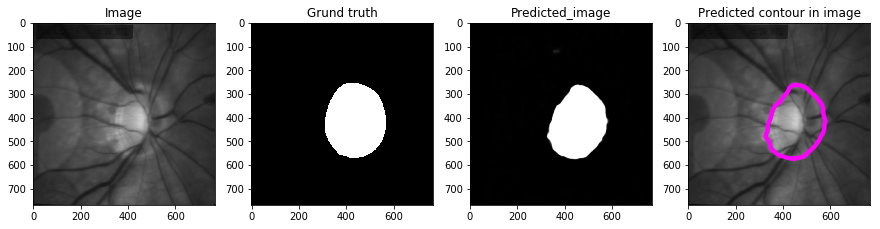

<Figure size 432x288 with 0 Axes>

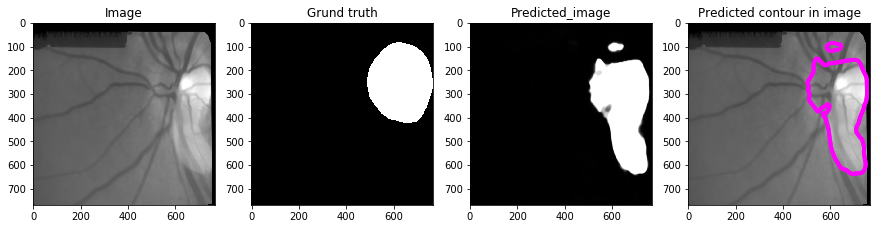

<Figure size 432x288 with 0 Axes>

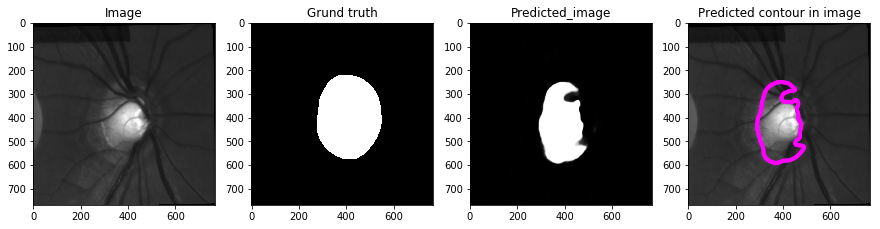

In [7]:
VisualizeUtils.draw_contours_dataset(process_results._imgs, process_results._masks, filtered_images)